In [1]:
# 適宜自分のApplicationPATHまで変更
APP_PATH = '/root'

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


import os
import sys
import cv2
from PIL import Image
import pandas as pd

In [2]:
# 画像データ(npzのバイナリファイル)の読み込み

# 対物レンズ10倍。
# 入力サイズ960px
# x.1の画像のみのデータセット


datasets_npz_x1 = np.load(APP_PATH + '/dataset_npz/x.1_dataset/sc_x10_960_x1.npz')
# datasets_npz_x3 = np.load(APP_PATH + '/dataset_npz/x.1_dataset/sc_x10_960_x1.npz')
# datasets_npz_all = np.load(APP_PATH + '/dataset_npz/x.1_dataset/sc_x10_960_x1.npz')

# 256なのでこちらを使う
# datasets_npz_x1 = np.load(APP_PATH + '/dataset_npz/x.3_dataset/x5/sc_x5_1.npz')



CATEGORIES=["S10C","S15C","S25C","S35C","S45C","S55C"]


# Xはdata, Yはtargetのこと
# print(datasets_npz_x1)
# print(datasets_npz_x1.files)

# データを3次元のtensor([c h w])に変換(1次元と3次元で比較)
images = datasets_npz_x1['x']
labels = datasets_npz_x1['y']

# transpose_images = np.empty(shape=1, dtype=float)
# print("transpose_images: {}".format(transpose_images))
images_list = []
labels_list = []

# NUM_DATA = 10
NUM_DATA = 60

# 正規化手法定義 MinMaxScaler(0<=data<=1)
mmscaler = preprocessing.MinMaxScaler()

for i, image in enumerate(images):
    # CPUが使い果たされてしまうので200までを使用
    if i == NUM_DATA:
        break

    # 正規化
    # print(f'image: ')
    # print(image)
    image = mmscaler.fit_transform(image)
    # print(f'image transform: ')
    # print(image)
    
    image = Image.fromarray(image)
    # print("image dtype: {}".format(type(image)))
    image = image.convert("RGB")

    # 32x32にリサイズ
    image = image.resize((32, 32))
    
    # print("image mode: {}".format(image.mode)) # むりやり3チャンネルにしているので表記上はRGBだが実際はL
    image = np.asarray(image, np.uint8)
    # print("image shape: {}".format(image.shape))
    image = np.transpose(image, (2, 0, 1))
    print("image transpose shape: {}".format(image.shape))
    # transpose_images = np.append(transpose_images, image, axis=0)
    images_list.append(image)
    labels_list.append(labels[i])
    
    print(i, '/', len(images))


transpose_images = np.array(images_list)
transpose_labels = np.array(labels_list)

# うまくいっていたら保存
print("transpose_images dtype: {}".format(type(transpose_images)))
print("transpose_images shape: {}".format(transpose_images.shape))
print("transpose_images: {}".format(transpose_images))

print("transpose_labels dtype: {}".format(type(transpose_labels)))
print("transpose_labels shape: {}".format(transpose_labels.shape))
print("transpose_labels: {}".format(transpose_labels))
np.savez(APP_PATH, 'data/temp/np_savez', transpose_images, datasets_npz_x1['y'])

# image = Image.fromarray(image)
# print("image dtype: {}".format(type(image)))
# image = image.convert("RGB")
# print("image mode: {}".format(image.mode)) # むりやり3チャンネルにしているので表記上はRGBだが実際はL
# image = np.asarray(image, np.uint8)
# print("image shape: {}".format(image.shape))
# image = np.transpose(image, (2, 0, 1))
# print("image transpose shape: {}".format(image.shape))

image transpose shape: (3, 32, 32)
0 / 290
image transpose shape: (3, 32, 32)
1 / 290
image transpose shape: (3, 32, 32)
2 / 290
image transpose shape: (3, 32, 32)
3 / 290
image transpose shape: (3, 32, 32)
4 / 290
image transpose shape: (3, 32, 32)
5 / 290
image transpose shape: (3, 32, 32)
6 / 290
image transpose shape: (3, 32, 32)
7 / 290
image transpose shape: (3, 32, 32)
8 / 290
image transpose shape: (3, 32, 32)
9 / 290
image transpose shape: (3, 32, 32)
10 / 290
image transpose shape: (3, 32, 32)
11 / 290
image transpose shape: (3, 32, 32)
12 / 290
image transpose shape: (3, 32, 32)
13 / 290
image transpose shape: (3, 32, 32)
14 / 290
image transpose shape: (3, 32, 32)
15 / 290
image transpose shape: (3, 32, 32)
16 / 290
image transpose shape: (3, 32, 32)
17 / 290
image transpose shape: (3, 32, 32)
18 / 290
image transpose shape: (3, 32, 32)
19 / 290
image transpose shape: (3, 32, 32)
20 / 290
image transpose shape: (3, 32, 32)
21 / 290
image transpose shape: (3, 32, 32)
22 / 29

In [3]:
# transformsなしの自作のデータセット作成
data = torch.tensor(transpose_images, dtype=torch.float32)
label = torch.tensor(transpose_labels, dtype=torch.int64)

print('data.shape:', data.shape, 'label.shape:', label.shape)

# Datasetを作成
dataset = torch.utils.data.TensorDataset(data, label)

X_sample, y_sample = dataset[0]
print(X_sample.shape, y_sample.shape)
print(X_sample)
print(y_sample)



# transformsを使ったrailにのったやり方(自作クラスを後に作成する)
# https://dreamer-uma.com/pytorch-dataset/

data.shape: torch.Size([60, 3, 32, 32]) label.shape: torch.Size([60])
torch.Size([3, 32, 32]) torch.Size([])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor(5)


In [4]:
# DataLoader ミニバッチ学習
# 入力値と目標値をまとめる


# 学習データ、検証データ、テストデータに分ける
# 各データセットのサンプル数を決定
# train : val : test = 60% : 20% : 20%
num_train = int(len(dataset) * 0.8)
# num_val = int(len(dataset) * 0.2)
num_test = int(len(dataset) - num_train)

print('num_train:', num_train)
# print('num_val:', num_val)
print('num_test:', num_test)

# ランダムにするらめにシードの固定をした
torch.manual_seed(0)
# データセットの分割
train, test = torch.utils.data.random_split(dataset, [num_train, num_test])
print('train:', train)
# print('val:', val)
print('test:', test)




# 一括でデータを作成
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size
# =0.8, random_state=1)


num_train: 48
num_test: 12
train: <torch.utils.data.dataset.Subset object at 0x7fef538bfd90>
test: <torch.utils.data.dataset.Subset object at 0x7fef538be350>


In [5]:
# ミニバッチ学習

# バッチサイズの定義(目安は全データの1/10だが正解がない)
# batch_size = 2
batch_size = 6
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
# val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

# 1つ目のバッチサイズに分割したデータを確認
x, t = next(iter(train_loader))

print('x:', x)
print('t:', t)



x: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
     

In [6]:
# 2.3 ニューラルネットワークの定義

num_classes = 6    # CIFAR10のクラスの数を指定

# class AlexNet(nn.Module):
#     def __init__(self, num_classes=num_classes):
#         super(AlexNet, self).__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=7, padding=2),     # 畳み込み層
#             nn.ReLU(inplace=True),                          # 活性化関数
#             nn.MaxPool2d(kernel_size=2),                    # プーリング層
#             nn.Conv2d(64, 192, kernel_size=5, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(192, 384, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(384, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2),
#         )
#         self.classifier = nn.Sequential(
#             nn.Dropout(),                   # ドロップアウト層
#             nn.Linear(256 * 3* 3, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Linear(4096, num_classes),
#         )

#     # 順伝搬を定義
#     def forward(self, x):
#         x = self.features(x)                # 画像特徴量抽出パート
#         x = x.view(x.size(0), 256 * 3 * 3)  # 3次元から1次元に変えて全結合層へ
#         x = self.classifier(x)              # 画像分類パート
#         return x

# n_input = 32 * 32 * 3 # 全結合するために使用する
n_input = 960 * 960 * 3 # 全結合するために使用する
n_output = 6
# 中間層のノード数(何でもよい：調べる必要あり)
# n_hidden = 128
n_hidden = 128


# https://www.youtube.com/watch?v=6roIEgXy7wA
class CNN(nn.Module):
    def __init__(self, n_output, n_hidden):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.maxpool = nn.MaxPool2d((2, 2))
        # self.flatten = nn.Flatten()
        # self.flatten = nn.Flatten()
        # self.l1 = nn.Linear(54378240, n_hidden)
        # self.l1 = nn.Linear(10875648, n_hidden)# btchsize 6
        # self.l1 = nn.Linear(3625216, n_hidden) # btchsize 2

        self.l1 = nn.Linear(738048, n_hidden)# btchsize 6(256)
        self.l1 = nn.Linear(6912, n_hidden)# btchsize 6(256)　32にリサイズ

        
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    # 順伝搬を定義
    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = torch.flatten(x)
        x = self.relu(self.l1(x))
        x = self.l2(x)
        return x




# flattenに入れる前の入力画像(特徴MAP)のサイズ確認
conv1 = nn.Conv2d(3, 32, 3)
conv2 = nn.Conv2d(32, 32, 3)
maxpool = nn.MaxPool2d((2, 2))
relu = nn.ReLU(inplace=True)

x = maxpool(relu(conv1(x)))
x = maxpool(relu(conv2(x)))
x = torch.flatten(x)

print("x shape: {}".format(x.shape))




# ネットワークのロード
# CPUとGPUのどちらを使うかを指定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# net = AlexNet().to(device)
print("Device: {}".format(device))
net = CNN(n_output, n_hidden).to(device)
print(net)
# デバイスの確認

x shape: torch.Size([6912])
Device: cuda
CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (l1): Linear(in_features=6912, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=6, bias=True)
  (relu): ReLU(inplace=True)
)


In [7]:
# 2.4 損失関数と最適化関数の定義

# 損失関数の定義
# criterion = nn.CrossEntropyLoss()
criterion = nn.BCEWithLogitsLoss()


# 活性化関数の定義(最適化アルゴリズムの設定(確率的勾降下法))
# lr = 0.01
lr = 0.001
# lr = 0.0001
# optimizer = optim.Adam(net.parameters())
optimizer = optim.SGD(net.parameters(), lr=lr)

In [8]:
# 2.5 学習

# 損失と正解率を保持するリストを作成
train_loss_list = []        # 学習損失
train_accuracy_list = []    # 学習データの正答率
test_loss_list = []         # 評価損失
test_accuracy_list = []     # テストデータの正答率

# 学習(エポック)の実行
epoch = 30
# epoch = 1
for i in range(epoch):
    # エポックの進行状況を表示
    print("-------------------------------")
    print("Epoch: {}/{}".format(i+1, epoch))
    
    # 損失と正解率の初期化
    train_loss = 0      # 学習損失
    train_accuracy = 0  # 学習データの正答率
    test_loss = 0       # 評価損失
    test_accuracy = 0   # テストデータの正答率
    
    # ---------学習パート--------- #
    # ニューラルネットワークを学習モードに設定
    net.train()
    # ミニバッチごとにデータをロードし学習
    for images, labels in train_loader:
        # GPUにTensorを転送
        images = images.to(device)
        labels = labels.to(device)
        
        # 勾配を初期化
        optimizer.zero_grad()
        # データを入力して予測値を計算(順伝播)
        y_pred_prob = net(images)
        # 損失(誤差)を計算
        print(f'y_pred_prob: ')
        print(y_pred_prob)
        print(f'labels: ')
        print(labels)
        print(type(labels))

        # 正解クラスを確率分布に変換
        # labels_one_hot = F.one_hot(labels, num_classes=6).float()

        labels_float = labels.float()

        print(labels_float)

        
        # loss = criterion(y_pred_prob, labels)
        loss = criterion(y_pred_prob, labels_float)
        # 勾配の計算(逆伝搬)
        loss.backward()
        # パラメータ(重み)の更新
        optimizer.step()
        
        # ミニバッチごとの損失を蓄積
        train_loss += loss.item()
        
        # 予測したラベルを予測確率y_pred_probから計算
        print(f'y_pred_prob: ')
        print(y_pred_prob)
        # print(y_pred_prob.dim())
        # print(torch.max(y_pred_prob))
        # print(torch.max(y_pred_prob, dim=0))
        print(f'y_pred_prob max: {torch.max(y_pred_prob, dim=0)[0]}')
        # print(type(labels))
        
        y_pred_labels = torch.max(y_pred_prob, dim=0)[0]
        # ミニバッチごとに正解したラベル数をカウント
        train_accuracy += torch.sum(y_pred_labels == labels).item() / len(labels)
    
    # エポックごとの損失と正解率を計算(ミニバッチの平均の損失と正解率を計算)
    epoch_train_loss = train_loss / len(train_loader)
    epoch_train_accuracy = train_accuracy / len(train_loader)
    # ---------学習パートはここまで--------- #
    
    # ---------評価パート--------- #
    # ニューラルネットワークを評価モードに設定
    net.eval()
    # 評価時の計算で自動微分機能をオフにする
    with torch.no_grad():
        for images, labels in test_loader:
            # GPUにTensorを転送
            images = images.to(device)
            labels = labels.to(device)
            # データを入力して予測値を計算(順伝播)
            y_pred_prob = net(images)
            # 損失(誤差)を計算
            labels_float = labels.float()
            loss = criterion(y_pred_prob, labels_float)
            # loss = criterion(y_pred_prob, torch.LongTensor(labels))
            # ミニバッチごとの損失を蓄積
            test_loss += loss.item()
            
            # 予測したラベルを予測確率y_pred_probから計算
            y_pred_labels = torch.max(y_pred_prob, dim=0)[0]
            # y_pred_labels = torch.max(y_pred_prob, 1)[1]
            # ミニバッチごとに正解したラベル数をカウント
            test_accuracy += torch.sum(y_pred_labels == labels).item() / len(labels)
        
    # エポックごとの損失と正解率を計算(ミニバッチの平均の損失と正解率を計算)
    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_accuracy = test_accuracy / len(test_loader)
    # ---------評価パートはここまで--------- #

    # エポックごとに損失と正解率を表示
    print("Train_Loss: {:.4f}, Train_Accuracy: {:.4f}".format(epoch_train_loss, epoch_train_accuracy))
    print("Test_Loss: {:.4f}, Test_Accuracy: {:.4f}".format(epoch_test_loss, epoch_test_accuracy))

    # 損失と正解率をリスト化して保存
    train_loss_list.append(epoch_train_loss)
    train_accuracy_list.append(epoch_train_accuracy)
    test_loss_list.append(epoch_test_loss)
    test_accuracy_list.append(epoch_test_accuracy)

-------------------------------
Epoch: 1/30
y_pred_prob: 
tensor([ 0.0514,  0.1179,  0.0106, -0.0388,  0.0047, -0.0393], device='cuda:0',
       grad_fn=<AddBackward0>)
labels: 
tensor([1, 1, 3, 5, 4, 2], device='cuda:0')
<class 'torch.Tensor'>
tensor([1., 1., 3., 5., 4., 2.], device='cuda:0')
y_pred_prob: 
tensor([ 0.0514,  0.1179,  0.0106, -0.0388,  0.0047, -0.0393], device='cuda:0',
       grad_fn=<AddBackward0>)
y_pred_prob max: 0.11794152855873108
y_pred_prob: 
tensor([ 0.0507,  0.1176,  0.0125, -0.0354,  0.0077, -0.0380], device='cuda:0',
       grad_fn=<AddBackward0>)
labels: 
tensor([2, 5, 2, 5, 0, 2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2., 5., 2., 5., 0., 2.], device='cuda:0')
y_pred_prob: 
tensor([ 0.0507,  0.1176,  0.0125, -0.0354,  0.0077, -0.0380], device='cuda:0',
       grad_fn=<AddBackward0>)
y_pred_prob max: 0.11760908365249634
y_pred_prob: 
tensor([ 0.0510,  0.1207,  0.0132, -0.0323,  0.0069, -0.0375], device='cuda:0',
       grad_fn=<AddBackward0>)
label

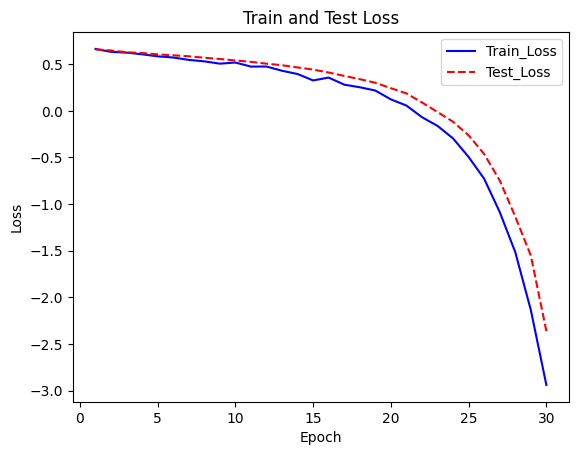

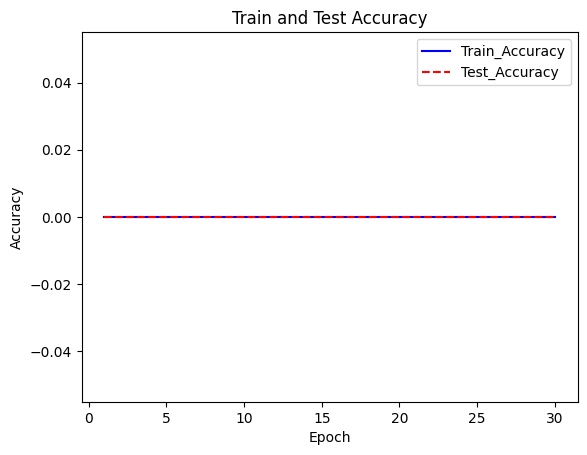

In [9]:
# 2.6 結果の可視化

# 損失
plt.figure()
plt.title('Train and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, epoch+1), train_loss_list, color='blue', linestyle='-', label='Train_Loss')
plt.plot(range(1, epoch+1), test_loss_list, color='red', linestyle='--', label='Test_Loss')
plt.legend()    # 凡例

# 正解率
plt.figure()
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, epoch+1), train_accuracy_list, color='blue', linestyle='-', label='Train_Accuracy')
plt.plot(range(1, epoch+1), test_accuracy_list, color='red', linestyle='--', label='Test_Accuracy')
plt.legend()    # 凡例

# 表示
plt.show()

In [10]:
# # 分類した画像を確認

# CATEGORIES=["S10C","S15C","S25C","S35C","S45C","S55C"]

# # ニューラルネットワークを評価モードに設定
# net.eval()
# # 評価時の計算で自動微分機能をオフにする
# with torch.no_grad():
#     for images, labels in test_loader:
#         # GPUにTensorを転送
#         images = images.to(device)
#         labels = labels.to(device)
#         # データを入力して予測値を計算(順伝播)
#         y_pred_prob = net(images)
#         # 予測したラベルを予測確率y_pred_probから計算
#         y_pred_labels = torch.max(y_pred_prob, dim=0)[0]
#         # y_pred_labels = torch.max(y_pred_prob, 1)[1]
        
#         for i in range(9):
#             image = images[i] / 2 + 0.5
#             image = image.to('cpu').numpy()
#             plt.subplot(3, 3, i+1)
#             # matplotlibでは(縦, 横, チャネル)の順
#             plt.imshow(np.transpose(image, (1, 2, 0)))
#             plt.title(CATEGORIES[labels[i]])
#             plt.title("{} ({})".format(CATEGORIES[y_pred_labels[i].item()], CATEGORIES[labels[i].item()]), color=('green' if y_pred_labels[i] == labels[i] else 'red'))
#             plt.axis('off')
#         plt.show()
#         break
